In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [15]:
LightGBM_results = pd.read_excel('LightGBM_results.xlsx')
#LSTM_results = pd.read_excel('LSTM_results.xlsx')
#Prophet_results = pd.read_excel('Prophet_results.xlsx')
SARIMA_results = pd.read_excel('SARIMA_results.xlsx')
XGBoost_results = pd.read_excel('XGBoost_results.xlsx')

In [16]:
lightgbm_forecasts = LightGBM_results['predicted']
xgboost_forecasts = XGBoost_results['predicted']
sarima_forecasts = SARIMA_results['predicted']
#prophet_forecasts = Prophet_results['predicted_sales']
#LSTM_forecasts = LSTM_results['Predicted']

In [17]:
stacking_dataset = pd.DataFrame({
    'LightGBM': lightgbm_forecasts,
    'XGBoost': xgboost_forecasts,
    'SARIMA': sarima_forecasts,
#    'LSTM': LSTM_forecasts,
#    'Prophet': prophet_forecasts,
})

In [19]:
stacking_dataset['Actual'] = LightGBM_results['actual']
stacking_dataset['Product_ID'] = LightGBM_results['item_id']
#stacking_dataset['Date'] = LightGBM_results['date']

In [20]:
X_stack = stacking_dataset.drop('Actual', axis=1)
y_stack = stacking_dataset['Actual']

In [21]:
base_estimator = DecisionTreeRegressor(max_depth=15)
meta_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
meta_model.fit(X_stack, y_stack)

c:\Users\Brian Silva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),
                  random_state=42)

In [22]:
stacked_forecasts = meta_model.predict(X_stack)

In [23]:
X_train_stack, X_valid_stack, y_train_stack, y_valid_stack = train_test_split(
    X_stack, y_stack, test_size=0.2, random_state=42)

meta_model.fit(X_train_stack, y_train_stack)

train_preds = meta_model.predict(X_train_stack)
train_rmse = mean_squared_error(y_train_stack, train_preds, squared=False)

valid_preds = meta_model.predict(X_valid_stack)
valid_rmse = mean_squared_error(y_valid_stack, valid_preds, squared=False)

print('Training RMSE:', train_rmse)
print('Validation RMSE:', valid_rmse)

c:\Users\Brian Silva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training RMSE: 3.287405111742883
Validation RMSE: 6.760241195246681


In [24]:
LightGBM_results_28 = pd.read_excel('LightGBM_results_28.xlsx')
LSTM_results_28 = pd.read_excel('LSTM_results_28.xlsx')
Prophet_results_28 = pd.read_excel('Prophet_results_28.xlsx')
SARIMA_results_28 = pd.read_excel('SARIMA_results_28.xlsx')
XGBoost_results_28 = pd.read_excel('XGBoost_results_28.xlsx')

In [25]:
LightGBM_predicted = LightGBM_results_28['predicted_sales']
LSTM_predicted = LSTM_results_28['Predicted']
SARIMA_predicted = SARIMA_results_28['predicted']
XGBoost_predicted = XGBoost_results_28['predicted']

In [26]:
stacking_dataset_28 = pd.DataFrame({
    'LightGBM': LightGBM_predicted,
    'XGBoost': XGBoost_predicted,
    'SARIMA': SARIMA_predicted,
    'Product_ID': LightGBM_results_28['item_id']
})

In [27]:
stacked_forecasts_28 = meta_model.predict(stacking_dataset_28)

In [28]:
results_df = pd.DataFrame({
    'date': LightGBM_results_28['date'],
    'Product_ID': LightGBM_results_28['item_id'],
    'predicted': stacked_forecasts_28,
    'actual': LightGBM_results_28['actual']
})

In [29]:
mae = mean_absolute_error(results_df['actual'], results_df['predicted'])
print('Mean Absolute Error:', mae)

mse = mean_squared_error(results_df['actual'], results_df['predicted'])

mse = mean_squared_error(results_df['actual'], results_df['predicted'])
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4.054354904350737
Root Mean Squared Error: 6.484400765344238


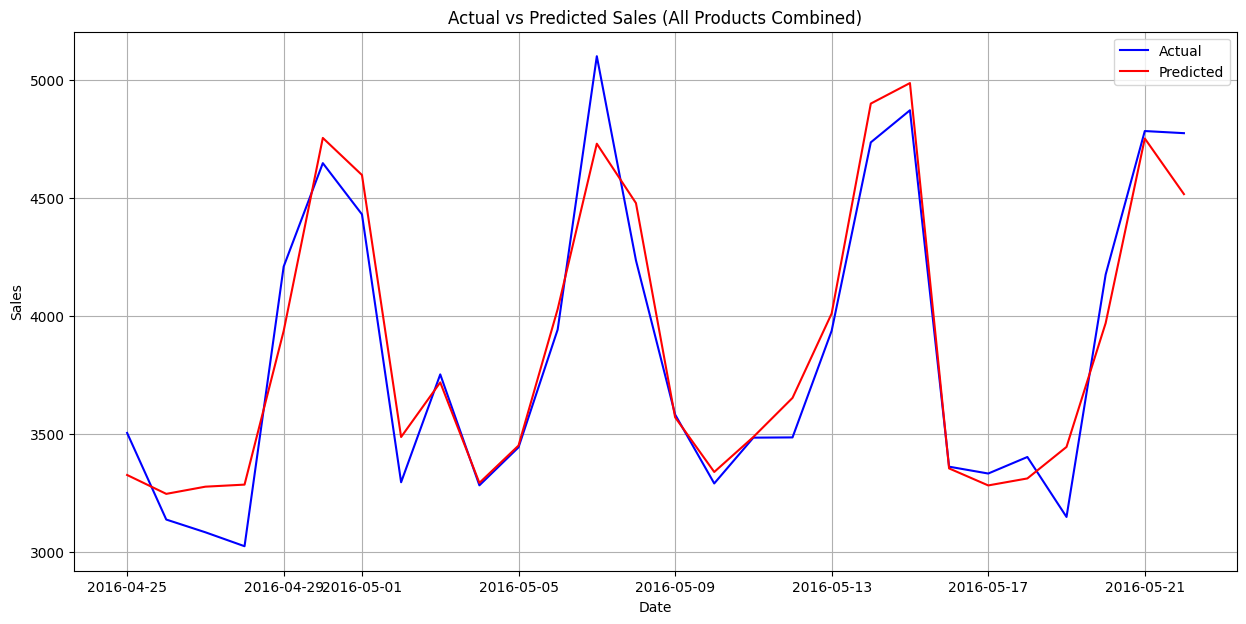

In [30]:
plt.figure(figsize=(15, 7))

results_df['date'] = pd.to_datetime(results_df['date'])

grouped = results_df.groupby('date').agg({
    'actual': 'sum',
    'predicted': 'sum'
}).reset_index()


plt.plot(grouped['date'], grouped['actual'], label='Actual', color='blue')
plt.plot(grouped['date'], grouped['predicted'], label='Predicted', color='red')

plt.legend() 
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (All Products Combined)')


plt.grid(True)
plt.show()

In [32]:
results_df.to_excel('ensemble_AdaBoost.xlsx')